In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the data
data = pd.read_csv('Employee_Attrition.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
data['left'].value_counts() #Gives like a counter for left named column in emp_data1

left
0    11428
1     3571
Name: count, dtype: int64

<Axes: xlabel='left'>

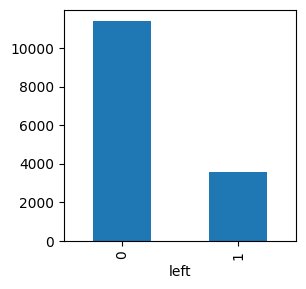

In [7]:
#We can use using any visualization technique 
plt.figure(figsize=(3, 3))
data['left'].value_counts().plot(kind='bar')#using bar chart

In [8]:
pd.crosstab(data.salary,data.left) #Comparing those two cols using crosstab in pandas

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<Axes: xlabel='salary'>

<Figure size 500x300 with 0 Axes>

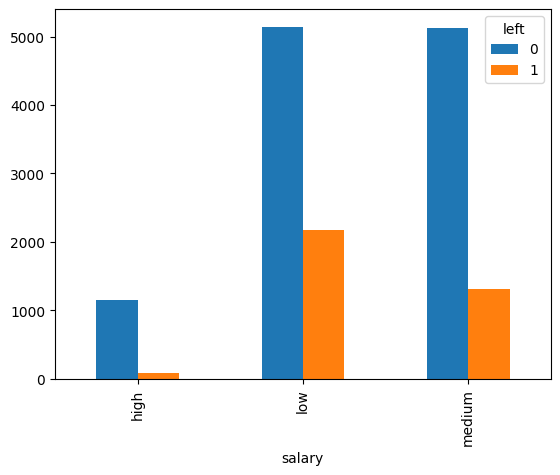

In [9]:
#We can plot it
plt.figure(figsize=(5, 3))
pd.crosstab(data.salary,data.left).plot(kind='bar')

In [10]:
#We can check for Department too
pd.crosstab(data.Department,data.left)

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


<Axes: xlabel='Department'>

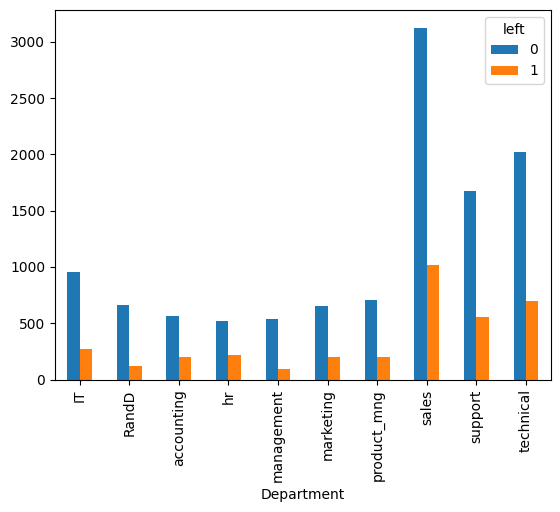

In [11]:
pd.crosstab(data.Department,data.left).plot(kind='bar')

In [12]:
# Check for duplicates and remove them
data.drop_duplicates(inplace=True)

In [13]:
# Encode the 'salary' column
le_salary = LabelEncoder()
data['salary'] = le_salary.fit_transform(data['salary'])

In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Department' column
le_department = LabelEncoder()
data['Department'] = le_department.fit_transform(data['Department'])

# Create a DataFrame to check the mapping of labels to numbers
department_mapping_df = pd.DataFrame({
    'Department_Label': le_department.classes_,  # Get the original department names
    'Encoded_Value': le_department.transform(le_department.classes_)  # Get their encoded values
})

# Display the mapping
print(department_mapping_df)

  Department_Label  Encoded_Value
0               IT              0
1            RandD              1
2       accounting              2
3               hr              3
4       management              4
5        marketing              5
6      product_mng              6
7            sales              7
8          support              8
9        technical              9


In [15]:
# Split data into features and target
X = data.drop('left', axis=1)
y = data['left']

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Create a random forest model
rf_model = RandomForestClassifier(n_estimators=100, max_features='log2', random_state=42)

In [19]:
# Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_features='log2', random_state=42)

In [20]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

In [21]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.980408503543143


In [22]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [23]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1990    8]
 [  39  362]]


In [24]:
# Determine and display the importance of each feature in the Random Forest model
score_list = rf_model.feature_importances_
list_of_features = list(X.columns)

# Create a DataFrame for feature importance
score_df = pd.DataFrame({"Feature": list_of_features, "Score": score_list})

# Sort the DataFrame by Score in descending order
score_df = score_df.sort_values(by='Score', ascending=False)

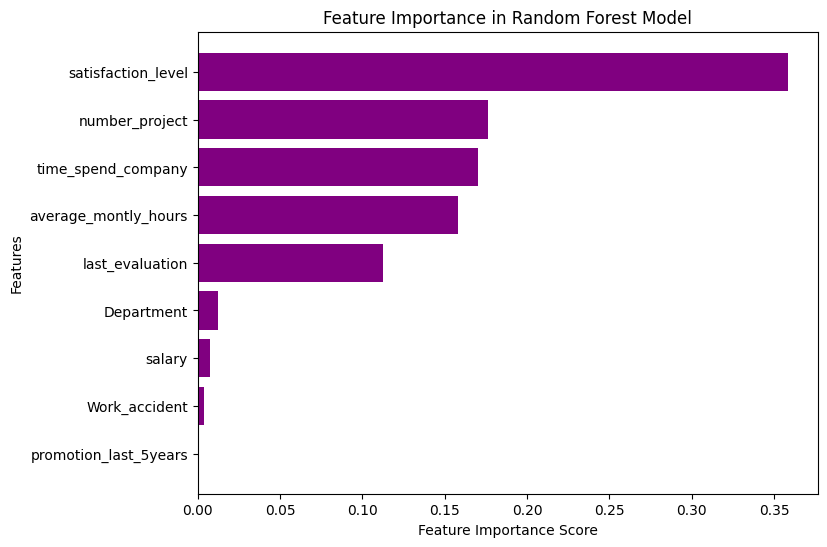

In [25]:
# Visualizing feature importance in descending order
plt.figure(figsize=(8, 6))
plt.barh(score_df['Feature'], score_df['Score'], color='purple')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [26]:
# Save the feature names in the correct order
joblib.dump(list(X.columns), 'feature_names_employee.pkl')

['feature_names_employee.pkl']

In [27]:
# Save the model and scaler
joblib.dump(rf_model, 'rf_model_employee.sav')
joblib.dump(scaler, 'scaler_employee.sav')
print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [28]:
# Save the mapping as a dictionary
department_mapping = {
    'IT': 0, 'RandD': 1, 'accounting': 2, 'hr': 3, 'management': 4, 
    'marketing': 5, 'product_mng': 6, 'sales': 7, 'support': 8, 'technical': 9
}

# Save this dictionary using joblib
joblib.dump(department_mapping, 'department_mapping.pkl')
print("Department labels saved")

Department labels saved
